### Introduction

Welcome to the Eigensolvers Quantum School Hackathon. In this notebook are 4 problems covering all the material covered in the lectures. These problems has been designed for people coming from all different levels of experience in quantum computing. You will get different certificate based on which problems you completed:

- First two: Beginner
- First three: Intermediate
- All four: Advanced

There are also prizes for the winners of the hackathon:

- First Place: RasQberry - Premium
- Second Place: RasQberry - All Inclusive
- Third Place: RasQberry - Customizable DIY Kit
- Fourth Place: Nielsen and Chuang

The ranking will be based on the weighted cost of the solutions for problem 3 and problem 4. 

The deadline for submission is Sunday 7pm (Indian Standard Time). Remember, the ultimate goal is to have fun and learn some quantum computing while you're at it. All the best!

### Import

In [1]:
from helper import *
from grader import *

### Pre-Requisites

###### Note that this notebook is written entirely in little-edian notation

The standard gates set in quantum literature uses CX and U gates. They are defined in terms of matrices, which represents their actions on basis states. $U$ gates are parameterized single-qubit local gates


$$U\big{(}\theta, \phi, \lambda\big{)} = \begin{bmatrix} \cos\big{(}\frac{\theta}{2}\big{)} & -e^{i\lambda}\sin\big{(}\frac{\theta}{2}\big{)} \\ e^{i\phi}\sin\big{(}\frac{\theta}{2}\big{)} & e^{i(\phi+\lambda)}\cos\big{(}\frac{\theta}{2}\big{)}\end{bmatrix}$$

Whereas $CX$ are two-qubit entangler gates.

$$CX = \begin{bmatrix} 1&0&0&0&0&0&0&0 \\ 0&1&0&0&0&0&0&0 \\ 0&0&1&0&0&0&0&0 \\ 0&0&0&0&0&0&0&1 \\ 0&0&0&0&1&0&0&0 \\ 0&0&0&0&0&1&0&0 \\ 0&0&0&0&0&0&1&0 \\ 0&0&0&1&0&0&0&0\end{bmatrix}$$

Some notable $U$ gates include:

$$U(0, 0, 0) = I, \quad U(\pi, 0, \pi) = X, \quad U(\frac{\pi}{2}, 0, -\frac{\pi}{2}) = H$$

$$U(0, 0, \pi) = Z, \quad U(0, 0, \frac{\pi}{2}) = S, \quad U(0, 0, \frac{\pi}{4}) = T$$

Note that the bottom three gates are collectively called phase gates, defined as

$$P(\alpha) = U(0, 0, \alpha) = \begin{bmatrix} 1&0 \\ 0&e^{i\alpha} \end{bmatrix}$$

### Problem 1: Inter-Basis Computation

One of the novelty of quantum computing over classical computing is the expansive state space that it has access to for computation. Whereas a classical bit is a binary system, qubits operates within the complex 2D Hilbert. This offers the advantage of quantum superposition, which allows for parallel computation of an exponential number of state at the same time. 

$$|\psi\rangle = \alpha|0\rangle + \beta|1\rangle$$

The majority of quantum algorithm employs superposition by computing in a different basis. For example, in both Shor's factoring, and Grover's search algorithm. The $n$-qubits circuit starts out with $n$ Hadmard gate in parralel, with the intention of transforming the qubits from the $Z$ basis to the $X$ basis.

As a quantum computing scientist, it is important to know how to take advantage of basis-equivalence computation. This when a gate in basis A has the same action on an intial state as another gate in basis B. In the $X$-basis, we have two identities for basis-equivalence gates. These are widely used in phase-kickback oracle and multi-qubit gates decomposition.

$$HZH = X, \quad HXH = Z$$

### Exercise

###### 1a. Given $3$ arbitrary unitary matrices $A, B, C$, find a triplet of unique unitary matrices $T, V, W$ that satisfies

$$ABC = H(TVW)H$$

where $H$ is the Hadamard matrix

In [2]:
t1, t2, t3, p1, p2, p3, l1, l2, l3 = np.random.uniform(0, 2*np.pi, (9,))

A = U(t1, p1, l1)
B = U(t2, p2, l2)
C = U(t3, p3, l3)

### WRITE YOUR CODE HERE
T=H@A@H
V=H@B@H
W=H@C@H
### END CODE

###### Grader

In [3]:
grader1a(A, B, C, T, V, W)

'Congratulations, your answer is correct 🎉'

##### 1b. Given arbitrary unitary matrices $A, B, C, D, E, F $, find unitary matrices $H, I, J, K, L, M$, such that 

$$ABCDEF = V(HIJKLM)V^{\dagger}$$

where $V = \begin{bmatrix} 0 & -\frac{\sqrt{2}}{2}-\frac{\sqrt{2}}{2}i \\ i & 0\end{bmatrix}$

In [4]:
t1, t2, t3, t4, t5, t6, p1, p2, p3, p4, p5, p6, l1, l2, l3, l4, l5, l6  = np.random.uniform(0, 2*np.pi, (18,))

A = U(t1, p1, l1)
B = U(t2, p2, l2)
C = U(t3, p3, l3)
D = U(t4, p4, l4)
E = U(t5, p5, l5)
F = U(t6, p6, l6)

### WRITE YOUR CODE HERE

import array_to_latex as a2l

V = np.array([[0,-1/np.sqrt(2)*complex(1,1)],[complex(0,1),0]])
V_dagger = dagger(V)

H = V@A@V_dagger
I = V@B@V_dagger
J = V@C@V_dagger
K = V@D@V_dagger
L = V@E@V_dagger
M = V@F@V_dagger

### END CODE

###### Grader

In [5]:
grader1b(A, B, C, D, E, F, H, I, J, K, L, M)

'Congratulations, your answer is correct 🎉'

### Problem 2: Correlated Qubits

A popular analogy of the probabilistic behavior of qubits are coin flips. When you flip a coin, the coin lands on heads $50\%$ of the time and tails $50\%$ of the time. But why don't build computers out of flipping coins. The reason for this is that coin flips are independent events, whereas in computations, you sometime needs your information to interact in correlated ways. 

As shown in lecture 1, a single qubit $|a\rangle$ is represented as a vector in the two-dimensional Hilbert space $\mathcal{H}_2$. In lecture 2, we see that the state of two independent qubits $|a\rangle, |b\rangle$ is represented as the tensor product $|a\rangle \otimes |b\rangle$, or $|a\rangle|b\rangle$. These tensor product states, however only covers a subspace of the 4-dimensional Hilbert space $\mathcal{H}_4$. This means that there exists vectors in $\mathcal{H}_4$ that cannot be described as a tensor product of two vectors in $\mathcal{H}_2$. An example of this is the Bell state $|\phi^{+}\rangle$.

$$|\phi^{+}\rangle = \frac{1}{\sqrt{2}}|00\rangle + \frac{1}{\sqrt{2}}|11\rangle$$

### Exercise

##### 2. Design a circuit made of $3$ qubits $(q_0, q_1, q_2)$, all initialized in the $|+\rangle$ states, such that whenever

- $q_0$ measure $|0\rangle$, $$q_1 \text{ measures } |0\rangle \: \& \: q_2 \text{ measures } |1\rangle$$

- $q_0$ measures $|1\rangle$, 

$$q_1 \text{ measures } |1\rangle \: \& \: q_2 \text{ measures } |0\rangle$$

Using the standard gates set $U, CX$.

The cost of the circuit is calculated by

$$cost = 10n_{cx} + n_{\text{local gates}}$$

In [6]:
circ = QuantumCircuit(3, 3)
circ.h([0, 1, 2])

### WRITE YOUR CODE HERE


### END CODE

###### View Circuit

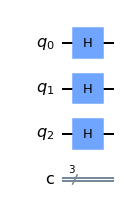

In [7]:
circ.draw('mpl')

###### Measure Circuit

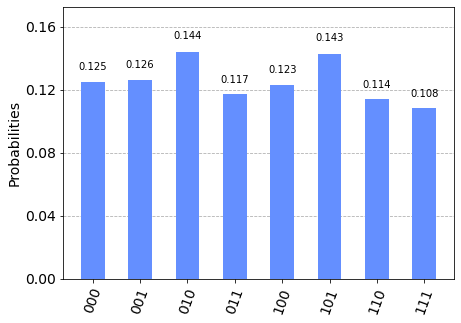

{'010': 147,
 '001': 129,
 '011': 120,
 '111': 111,
 '100': 126,
 '101': 146,
 '110': 117,
 '000': 128}

In [8]:
### DON'T EDIT ANYTHING

qc = QuantumCircuit(3, 3)

qc = circ.copy(qc)

qc.barrier()

qc.measure([0, 1, 2], [0, 1, 2])

sim(qc)

###### Grader

In [9]:
grader2(circ)

'Circuit is not correct'

### Problem 3: The Quantum Oracle

A feature of many quantum algorithm is the oracle, also called a black box function. This is a series of gates, whose exact composition we don't know, but what we do know is its general action on any arbitrary states of its input. We have cover the Deutsch's oracle in lecture 4. This was the first quantum algorithm, and more importantly it was the first demonstration of quantum computing supremacy. Other oracular algorithms extend on Deutsch's idea of parallel computation of all the basis states. These includes the Bernstein-Vazirani modular sum algorithm, the Grover's search algorithm and the Shor's prime factoring algorithm.

In this exercise, we will be implementing an oracle. This means that we translate its general actions into a series of specific gates that we can run on a quantum computer.

### Exercise

#### 3. Design an oracle $U_f$ which implements the function $f$ on 5 qubits such that 

$$f(|q_0q_1q_2q_3q_4)\rangle = e^{i\theta_x}|q_0\bar{q_1}q_2\bar{q_3}\rangle|(\bar{q_0}\wedge q_1 \wedge \bar{q_2} \wedge q_3)\oplus q_4 \rangle$$

where $\bar{q_i}$ is the bit-flipped of $q_i$ and $e^{i\theta_x}$ is an arbitrary relative phase depending on the input using the standard gate set with the lowerst cost possible calculated by the cost function

$$cost = 20n_{\text{ancilla}} + 10n_{\text{cx}} + n_{\text{local gates}} $$

In [10]:
no_qubits = 5

circ = QuantumCircuit(no_qubits)

### WRITE YOUR CODE HERE


### END CODE

SyntaxError: invalid syntax (<ipython-input-10-6353a69833db>, line 1)

###### View Circuit

In [ ]:
circ.draw('mpl')

In [ ]:
grader3(circ)

### Problem 4: Fun with Quantum

In the last exercise we will be implementing some classical function with quantum gates. This is something the Eigensolvers do everyday to help us gain an intuition of quantum circuits. The point here is not just to solve the problem, that's easy enough to do. What we're looking at here is the most optimized circuit, so you need to bring everything you know about circuit identities in here and try to be creative and get the lowest cost possible. 

#### 4. Given the following mapping of computational basis, find the least expensive $3$-qubits circuit that performs the same mapping using only $CCX, CX, U$ gates. Note that relative phase for output ARE allowed!

The total cost will combined gates from all $3$ mappings, using the metric.

$$cost = 60n_{ccx} + 10n_{cx} + n_{\text{local gates}}$$

##### Mapping a)

$$000 ---> 100$$
$$001 ---> 011$$
$$010 ---> 110$$
$$011 ---> 001$$
$$100 ---> 000$$
$$101 ---> 111$$
$$110 ---> 010$$
$$111 ---> 101$$

In [ ]:
circ = QuantumCircuit(3)

### WRITE YOUR CODE HERE


### END CODE

###### View Circuit

In [ ]:
circ.draw('mpl')

###### Grader

In [ ]:
grader4a(circ)

##### Mapping b)


$$000 ---> 100$$
$$001 ---> 001$$
$$010 ---> 110$$
$$011 ---> 011$$
$$100 ---> 111$$
$$101 ---> 010$$
$$110 ---> 101$$
$$111 ---> 000$$

In [ ]:
circ = QuantumCircuit(3)

### WRITE YOUR CODE HERE


### END CODE

###### View Circuit

In [ ]:
circ.draw('mpl')

###### Grader

In [ ]:
grader4b(circ)

###### Mapping c)

$$000 ---> 001$$
$$001 ---> 101$$
$$010 ---> 100$$
$$011 ---> 011$$
$$100 ---> 010$$
$$101 ---> 110$$
$$110 ---> 000$$
$$111 ---> 111$$

In [ ]:
circ = QuantumCircuit(3)

### WRITE YOUR CODE HERE


### END CODE

###### View Circuit

In [ ]:
circ.draw('mpl')

###### Grader

In [ ]:
grader4c(circ)

### Solutions Submission

Submit your solution to Problem 3 and Problem 4 here. You can submit multiple times so as soon as you have a solution, submit. The highest score will be posted the throughout the hackathon.

Submission link: https://forms.gle/9xX1QGdjtDyy9TLn9